# Collaborative Filtering

* Makes use of data about **who brought what**, in the most basic sense.
* Netflix, Amazon etc use it for their recommendation engine
* In its most barebones version : A two column approach -> user_id and product_id
* It could also be user_id, product_id, stars, time_stamp
* It could be a sparse matrix i.e. most users did not buy most of the products and hence zeros in many cells

In [0]:
from fastai import *
from fastai.collab import *

In [0]:
path = untar_data(URLs.ML_SAMPLE)
path

PosixPath('/root/.fastai/data/movie_lens_sample')

In [0]:
user, item, title = 'userId', 'movieId', 'title'

In [0]:
ratings = pd.read_csv(path/'ratings.csv')
ratings.head()

,userId,movieId,rating,timestamp
0,73,1097,4.0,1255504951
1,561,924,3.5,1172695223
2,157,260,3.5,1291598691
3,358,1210,5.0,957481884
4,130,316,2.0,1138999234


For the architecture we specify the `n_factors`

In [0]:
y_range  = [0,5.5]

In [0]:
data = CollabDataBunch.from_df(ratings, seed=42)

In [0]:
learn = collab_learner(data, n_factors=50, y_range=y_range)

In [0]:
learn.summary()

EmbeddingDotBias
Layer (type)         Output Shape         Param #    Trainable 
Embedding            [50]                 5,050      True      
______________________________________________________________________
Embedding            [50]                 5,050      True      
______________________________________________________________________
Embedding            [1]                  101        True      
______________________________________________________________________
Embedding            [1]                  101        True      
______________________________________________________________________

Total params: 10,302
Total trainable params: 10,302
Total non-trainable params: 0
Optimized with 'torch.optim.adam.Adam', betas=(0.9, 0.99)
Using true weight decay as discussed in https://www.fast.ai/2018/07/02/adam-weight-decay/ 
Loss function : FlattenedLoss
Callbacks functions applied 

In [0]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


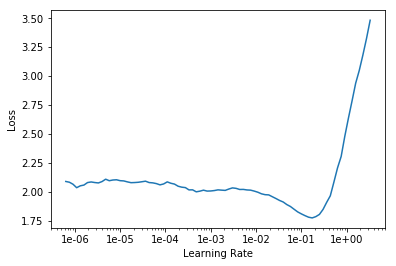

In [0]:
learn.recorder.plot()

In [0]:
learn.fit_one_cycle(3, 3e-2)

epoch,train_loss,valid_loss,time
0,1.130273,0.870133,00:00
1,0.768851,0.751016,00:00
2,0.372031,0.716194,00:01


Now we can pick a user_id and movie_id and see if a user would like the movie!

* In practice, we have a cold start problem i.e. no data in the collaborative system.
* To solve the cold start problem, we can have a 2nd model driven by meta-data.  

We can select the users who brought the most products and the products that were brought the most. The matrix would be no longer sparse.

## Theory

EmbeddingDotBias from fastai is as follows,

```python
class EmbeddingDotBias(Module):
    "Base dot model for collaborative filtering."
    def __init__(self, n_factors:int, n_users:int, n_items:int, y_range:Tuple[float,float]=None):
        self.y_range = y_range
        (self.u_weight, self.i_weight, self.u_bias, self.i_bias) = [embedding(*o) for o in [
            (n_users, n_factors), (n_items, n_factors), (n_users,1), (n_items,1)
        ]]

    def forward(self, users:LongTensor, items:LongTensor) -> Tensor:
        dot = self.u_weight(users)* self.i_weight(items)
        res = dot.sum(1) + self.u_bias(users).squeeze() + self.i_bias(items).squeeze()
        if self.y_range is None: return res
        return torch.sigmoid(res) * (self.y_range[1]-self.y_range[0]) + self.y_range[0]

```



* The PyTorch module for all neural networks is called `nn.module`
* `forward()`  is called for these classes
* \__init\__ : dunder init AKA constructor
* PyTorch uses AutoDiff to calculate the gradients for us. Not to be explicitly stated.

In [0]:
class EmbeddingDotBias(Module):
    "Base dot model for collaborative filtering."
    def __init__(self, n_factors:int, n_users:int, n_items:int, y_range:Tuple[float,float]=None):
        self.y_range = y_range
        (self.u_weight, self.i_weight, self.u_bias, self.i_bias) = [embedding(*o) for o in [
            (n_users, n_factors), (n_items, n_factors), (n_users,1), (n_items,1)
        ]]

    def forward(self, users:LongTensor, items:LongTensor) -> Tensor:
        dot = self.u_weight(users)* self.i_weight(items)
        res = dot.sum(1) + self.u_bias(users).squeeze() + self.i_bias(items).squeeze()
        if self.y_range is None: return res
        return torch.sigmoid(res) * (self.y_range[1]-self.y_range[0]) + self.y_range[0]

## Embeddings

* Its just a matrix of weights
* For e.g. Embedding matrix of users and products
* Adding bias terms to compensate for : what if some products are brought more than the others and what if some users buy more products
* A dot product and then add a bias term

## Movielens 100k

- Available : http://files.grouplens.org/datasets/movielens/ml-100k.zip

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
path = 'drive/My Drive/fast.ai/ml-100k.zip'

In [0]:
!unzip drive/'My Drive'/fast.ai/ml-100k.zip

Archive:  drive/My Drive/fast.ai/ml-100k.zip
   creating: ml-100k/
  inflating: ml-100k/allbut.pl       
  inflating: ml-100k/mku.sh          
  inflating: ml-100k/README          
  inflating: ml-100k/u.data          
  inflating: ml-100k/u.genre         
  inflating: ml-100k/u.info          
  inflating: ml-100k/u.item          
  inflating: ml-100k/u.occupation    
  inflating: ml-100k/u.user          
  inflating: ml-100k/u1.base         
  inflating: ml-100k/u1.test         
  inflating: ml-100k/u2.base         
  inflating: ml-100k/u2.test         
  inflating: ml-100k/u3.base         
  inflating: ml-100k/u3.test         
  inflating: ml-100k/u4.base         
  inflating: ml-100k/u4.test         
  inflating: ml-100k/u5.base         
  inflating: ml-100k/u5.test         
  inflating: ml-100k/ua.base         
  inflating: ml-100k/ua.test         
  inflating: ml-100k/ub.base         
  inflating: ml-100k/ub.test         


In [0]:
ls

drive/  ml-100k/  sample_data/


In [0]:
path = Path('ml-100k/')

In [0]:
ratings = pd.read_csv(path/'u.data', delimiter='\t', header=None,
                     names=[user,item,'rating','timestamp'])
ratings.head()

,userId,movieId,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [0]:
movies = pd.read_csv(path/'u.item',  delimiter='|', encoding='latin-1', header=None,
                    names=[item, 'title', 'date', 'N', 'url', *[f'g{i}' for i in range(19)]])
movies.head()

,movieId,title,date,N,url,g0,g1,g2,g3,g4,g5,g6,g7,g8,g9,g10,g11,g12,g13,g14,g15,g16,g17,g18
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0


- There are 19 genres of the movies
- Its n-hot encoded! (Not one hot)

In [0]:
len(ratings)

100000

In [0]:
rating_movie = ratings.merge(movies[[item, title]])

In [0]:
rating_movie.head()

,userId,movieId,rating,timestamp,title
0,196,242,3,881250949,Kolya (1996)
1,63,242,3,875747190,Kolya (1996)
2,226,242,5,883888671,Kolya (1996)
3,154,242,3,879138235,Kolya (1996)
4,306,242,5,876503793,Kolya (1996)


In [0]:
data = CollabDataBunch.from_df(rating_movie, seed=42,valid_pct=0.1, item_name=title)

In [0]:
data.show_batch(10)

userId,title,target
197,Scream 2 (1997),3.0
486,Kiss the Girls (1997),3.0
363,Get Shorty (1995),5.0
894,"Fan, The (1996)",3.0
504,Geronimo: An American Legend (1993),4.0
243,Chasing Amy (1997),4.0
144,Star Wars (1977),5.0
452,"Abyss, The (1989)",4.0
693,Air Force One (1997),2.0
268,Tank Girl (1995),3.0


In [0]:
y_range = [0, 5.5] # to predict in the correct range

- Make it a little more than minimum and a little more than maximum since the sigmoid asymtotes near the extremes (?)

- n_factors : embedding size 

- These represent the latent factors like actor, director, story etc

- It does matrix vectorization

In [0]:
learn = collab_learner(data, n_factors=40, y_range=y_range, wd=1e-1)

In [0]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 6.31E-07
Min loss divided by 10: 3.02E-02


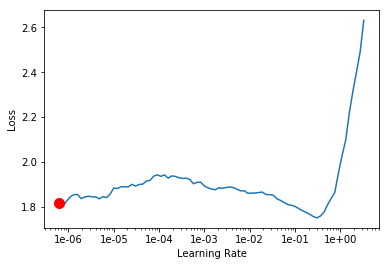

In [0]:
learn.recorder.plot(suggestion=True)

In [0]:
learn.fit_one_cycle(5, 5e-03) # Jermemy suggested 5e-03; comes from practice

epoch,train_loss,valid_loss,time
0,0.908097,0.940560,00:12
1,0.841779,0.882325,00:13
2,0.789429,0.838768,00:13
3,0.668123,0.815148,00:14
4,0.560549,0.812945,00:14


In [0]:
learn.save('phase-1')

### Interpretation

In [0]:
learn.load('phase-1')

CollabLearner(data=TabularDataBunch;

Train: LabelList (90000 items)
x: CollabList
userId 196; title Kolya (1996); ,userId 63; title Kolya (1996); ,userId 226; title Kolya (1996); ,userId 154; title Kolya (1996); ,userId 306; title Kolya (1996); 
y: FloatList
3.0,3.0,5.0,3.0,5.0
Path: .;

Valid: LabelList (10000 items)
x: CollabList
userId 498; title Casino (1995); ,userId 642; title Pocahontas (1995); ,userId 58; title 2001: A Space Odyssey (1968); ,userId 495; title Cat People (1982); ,userId 618; title Philadelphia (1993); 
y: FloatList
3.0,5.0,4.0,3.0,3.0
Path: .;

Test: None, model=EmbeddingDotBias(
  (u_weight): Embedding(944, 40)
  (i_weight): Embedding(1654, 40)
  (u_bias): Embedding(944, 1)
  (i_bias): Embedding(1654, 1)
), opt_func=functools.partial(<class 'torch.optim.adam.Adam'>, betas=(0.9, 0.99)), loss_func=FlattenedLoss of MSELoss(), metrics=[], true_wd=True, bn_wd=True, wd=0.1, train_bn=True, path=PosixPath('.'), model_dir='models', callback_fns=[functools.partial(<clas

In [0]:
learn.model

EmbeddingDotBias(
  (u_weight): Embedding(944, 40)
  (i_weight): Embedding(1654, 40)
  (u_bias): Embedding(944, 1)
  (i_bias): Embedding(1654, 1)
)

### How many ratings does a movie have?

In [0]:
g = rating_movie.groupby(title)['rating'].count()
top_movies = g.sort_values(ascending=False).index.values[:1000]
top_movies[:10]

array(['Star Wars (1977)', 'Contact (1997)', 'Fargo (1996)', 'Return of the Jedi (1983)', 'Liar Liar (1997)',
       'English Patient, The (1996)', 'Scream (1996)', 'Toy Story (1995)', 'Air Force One (1997)',
       'Independence Day (ID4) (1996)'], dtype=object)

Star Wars was rated the most.

### Movie Bias

In [0]:
movie_bias = learn.bias(top_movies, is_item=True)
movie_bias.size()

torch.Size([1000])

In [0]:
mean_ratings = rating_movie.groupby(title)['rating'].mean()
movie_ratings = [(b, i, mean_ratings.loc[i]) for i,b in zip(top_movies,movie_bias)]

In [0]:
item0 = lambda o:o[0]

In [0]:
sorted(movie_ratings, key=item0)[:15]

[(tensor(-0.3479),
  'Children of the Corn: The Gathering (1996)',
  1.3157894736842106),
 (tensor(-0.3002), 'Cable Guy, The (1996)', 2.339622641509434),
 (tensor(-0.2982), 'Mortal Kombat: Annihilation (1997)', 1.9534883720930232),
 (tensor(-0.2955),
  'Lawnmower Man 2: Beyond Cyberspace (1996)',
  1.7142857142857142),
 (tensor(-0.2846), 'Island of Dr. Moreau, The (1996)', 2.1578947368421053),
 (tensor(-0.2777), 'Striptease (1996)', 2.2388059701492535),
 (tensor(-0.2432), 'Bio-Dome (1996)', 1.903225806451613),
 (tensor(-0.2288), 'Crow: City of Angels, The (1996)', 1.9487179487179487),
 (tensor(-0.2275), 'Grease 2 (1982)', 2.0),
 (tensor(-0.2273), 'Barb Wire (1996)', 1.9333333333333333),
 (tensor(-0.2174), "Joe's Apartment (1996)", 2.2444444444444445),
 (tensor(-0.2160), "McHale's Navy (1997)", 2.1884057971014492),
 (tensor(-0.2114), 'Home Alone 3 (1997)', 1.894736842105263),
 (tensor(-0.2088), 'Free Willy 3: The Rescue (1997)', 1.7407407407407407),
 (tensor(-0.2051), 'Hellraiser: Blood

In [0]:
sorted(movie_ratings, key=lambda o: o[0], reverse=True)[:15]

[(tensor(0.6110), "Schindler's List (1993)", 4.466442953020135),
 (tensor(0.6059), 'Titanic (1997)', 4.2457142857142856),
 (tensor(0.5843), 'Shawshank Redemption, The (1994)', 4.445229681978798),
 (tensor(0.5596), 'L.A. Confidential (1997)', 4.161616161616162),
 (tensor(0.5230), 'Star Wars (1977)', 4.3584905660377355),
 (tensor(0.5179), 'Good Will Hunting (1997)', 4.262626262626263),
 (tensor(0.5170), 'Rear Window (1954)', 4.3875598086124405),
 (tensor(0.5057), 'Silence of the Lambs, The (1991)', 4.28974358974359),
 (tensor(0.5041), 'Casablanca (1942)', 4.45679012345679),
 (tensor(0.5004), 'As Good As It Gets (1997)', 4.196428571428571),
 (tensor(0.4931), 'Boot, Das (1981)', 4.203980099502488),
 (tensor(0.4930), 'Usual Suspects, The (1995)', 4.385767790262173),
 (tensor(0.4922), 'Close Shave, A (1995)', 4.491071428571429),
 (tensor(0.4860), 'Godfather, The (1972)', 4.283292978208232),
 (tensor(0.4537), "One Flew Over the Cuckoo's Nest (1975)", 4.291666666666667)]

### Movie Weights

In [0]:
movie_w = learn.weight(top_movies, is_item=True)
movie_w.shape

torch.Size([1000, 40])

So we get 40 factors. Lets squash the dimensions from 40 to 3 using PCA to find 3 principle components.


In [0]:
movie_pca = movie_w.pca(3)
movie_pca.shape

torch.Size([1000, 3])

In [0]:
fac0, fac1, fac2 = movie_pca.t()

In [0]:
movie_comp = [(f, i) for f, i in zip(fac0, top_movies)]

In [0]:
sorted(movie_comp, key=itemgetter(0), reverse=True)[:10]

[(tensor(1.0573), 'Wrong Trousers, The (1993)'),
 (tensor(1.0358), 'Close Shave, A (1995)'),
 (tensor(1.0177), 'Chinatown (1974)'),
 (tensor(1.0141), 'Third Man, The (1949)'),
 (tensor(1.0078), 'Lawrence of Arabia (1962)'),
 (tensor(1.0067), 'Godfather, The (1972)'),
 (tensor(0.9922), 'Casablanca (1942)'),
 (tensor(0.9893), 'Persuasion (1995)'),
 (tensor(0.9812), 'When We Were Kings (1996)'),
 (tensor(0.9339), 'Godfather: Part II, The (1974)')]

In [0]:
sorted(movie_comp, key=itemgetter(0), reverse=False)[:10]

[(tensor(-1.2931), 'Home Alone 3 (1997)'),
 (tensor(-1.2870), "McHale's Navy (1997)"),
 (tensor(-1.2314), 'Jungle2Jungle (1997)'),
 (tensor(-1.1697), 'Leave It to Beaver (1997)'),
 (tensor(-1.1616), 'Congo (1995)'),
 (tensor(-1.1241), 'Children of the Corn: The Gathering (1996)'),
 (tensor(-1.0781), 'Free Willy 3: The Rescue (1997)'),
 (tensor(-1.0320), 'Bio-Dome (1996)'),
 (tensor(-1.0310), 'Batman & Robin (1997)'),
 (tensor(-1.0009), 'Grease 2 (1982)')]

In [0]:
movie_comp = [(f, i) for f, i in zip(fac1, top_movies)]

In [0]:
sorted(movie_comp, key=itemgetter(0), reverse=True)[:10]

[(tensor(0.9212), 'Ready to Wear (Pret-A-Porter) (1994)'),
 (tensor(0.8700), 'Keys to Tulsa (1997)'),
 (tensor(0.8682), 'Trainspotting (1996)'),
 (tensor(0.7787), 'Brazil (1985)'),
 (tensor(0.7777), 'Cable Guy, The (1996)'),
 (tensor(0.7510), 'Beavis and Butt-head Do America (1996)'),
 (tensor(0.7382), 'Nosferatu (Nosferatu, eine Symphonie des Grauens) (1922)'),
 (tensor(0.7342), 'Serial Mom (1994)'),
 (tensor(0.7126), 'Clockwork Orange, A (1971)'),
 (tensor(0.7117), 'Lost Highway (1997)')]

In [0]:
sorted(movie_comp, key=itemgetter(0), reverse=False)[:10]

[(tensor(-1.1568), 'Braveheart (1995)'),
 (tensor(-1.0479), 'Raiders of the Lost Ark (1981)'),
 (tensor(-1.0409), 'Titanic (1997)'),
 (tensor(-0.9361), 'American President, The (1995)'),
 (tensor(-0.8854), 'Forrest Gump (1994)'),
 (tensor(-0.8448), 'Pretty Woman (1990)'),
 (tensor(-0.8438), 'Star Wars (1977)'),
 (tensor(-0.8422), 'Affair to Remember, An (1957)'),
 (tensor(-0.8269), "Mr. Holland's Opus (1995)"),
 (tensor(-0.8189), 'Sleepless in Seattle (1993)')]

In [0]:
movie_comp = [(f, i) for f, i in zip(fac2, top_movies)]

In [0]:
sorted(movie_comp, key=itemgetter(0), reverse=True)[:10]

[(tensor(0.7162), 'Steel (1997)'),
 (tensor(0.6833), 'Crucible, The (1996)'),
 (tensor(0.6505), 'Piano, The (1993)'),
 (tensor(0.6319), 'Postman, The (1997)'),
 (tensor(0.6182), 'To Kill a Mockingbird (1962)'),
 (tensor(0.6089), 'English Patient, The (1996)'),
 (tensor(0.5946), 'Bridges of Madison County, The (1995)'),
 (tensor(0.5931), 'Sound of Music, The (1965)'),
 (tensor(0.5904), 'Dirty Dancing (1987)'),
 (tensor(0.5838), 'Gone with the Wind (1939)')]

In [0]:
sorted(movie_comp, key=itemgetter(0), reverse=False)[:10]

[(tensor(-1.0609), 'Beavis and Butt-head Do America (1996)'),
 (tensor(-0.9236), 'Terminator, The (1984)'),
 (tensor(-0.8835), 'Scream (1996)'),
 (tensor(-0.8285), 'Starship Troopers (1997)'),
 (tensor(-0.7916), 'Clerks (1994)'),
 (tensor(-0.7839), 'Reservoir Dogs (1992)'),
 (tensor(-0.7704), 'Terminator 2: Judgment Day (1991)'),
 (tensor(-0.7576), 'Rock, The (1996)'),
 (tensor(-0.7468), 'Army of Darkness (1993)'),
 (tensor(-0.7331), 'Star Wars (1977)')]

### Visualizing two principle components

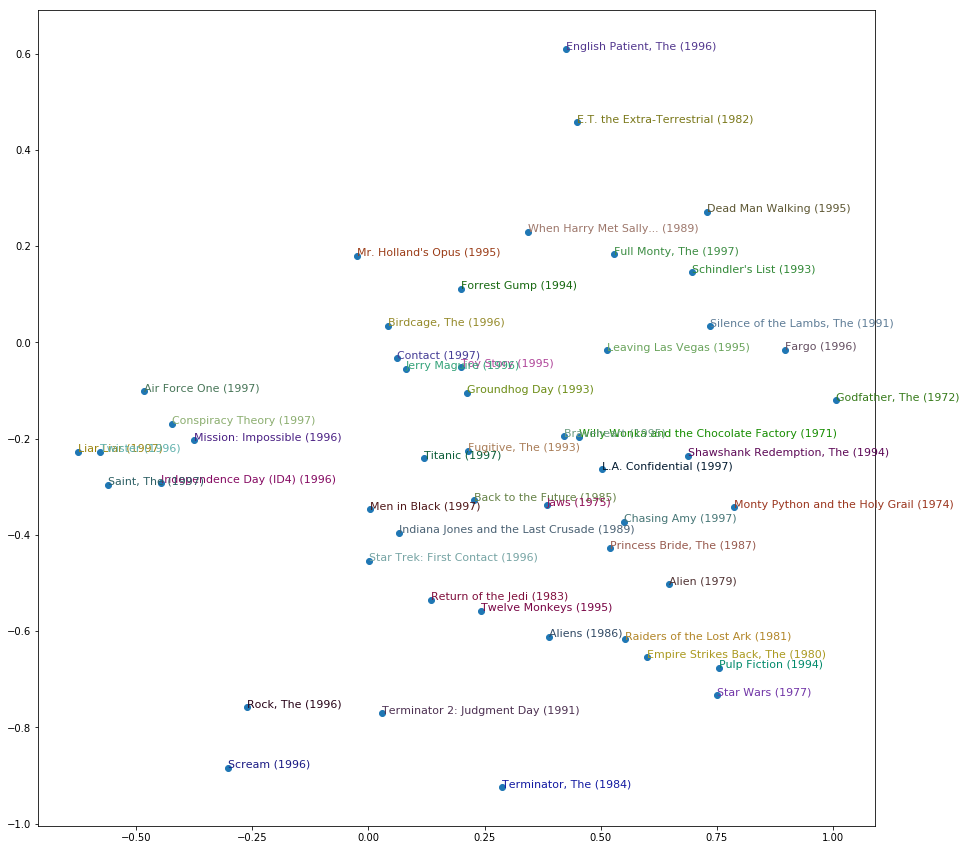

In [0]:
idxs = np.random.choice(len(top_movies), 50, replace=False)
idxs = list(range(50))
X = fac0[idxs]
Y = fac2[idxs]
plt.figure(figsize=(15,15))
plt.scatter(X, Y)
for i, x, y in zip(top_movies[idxs], X, Y):
    plt.text(x,y,i, color=np.random.rand(3)*0.7, fontsize=11)
plt.show()